# Random Forest


## Imports


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from util import *
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
NUM_FOLDS = 5


## Read the data


### Train Data


In [4]:
X, y = get_train_data(path='../data/train.csv')


In [5]:
# standardize the data
X = standardize_features(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model


In [7]:
clf = RandomForestClassifier(
    n_estimators=50, max_depth=20, min_samples_split=2)
clf.fit(X_train, y_train)
cv_results = cross_validate(clf, X_train, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())
print('f1_weighted: ', cv_results['test_f1_weighted'].mean())


accuracy:  0.899375
f1_macro:  0.4735107951096853
f1_micro:  0.899375
f1_weighted:  0.8517284097806297


## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


     feature  importance
81    var_81    0.018642
12    var_12    0.013464
139  var_139    0.012625
53    var_53    0.011079
26    var_26    0.010928
..       ...         ...
42    var_42    0.003263
158  var_158    0.003238
47    var_47    0.003234
37    var_37    0.003196
54    var_54    0.003188

[200 rows x 2 columns]


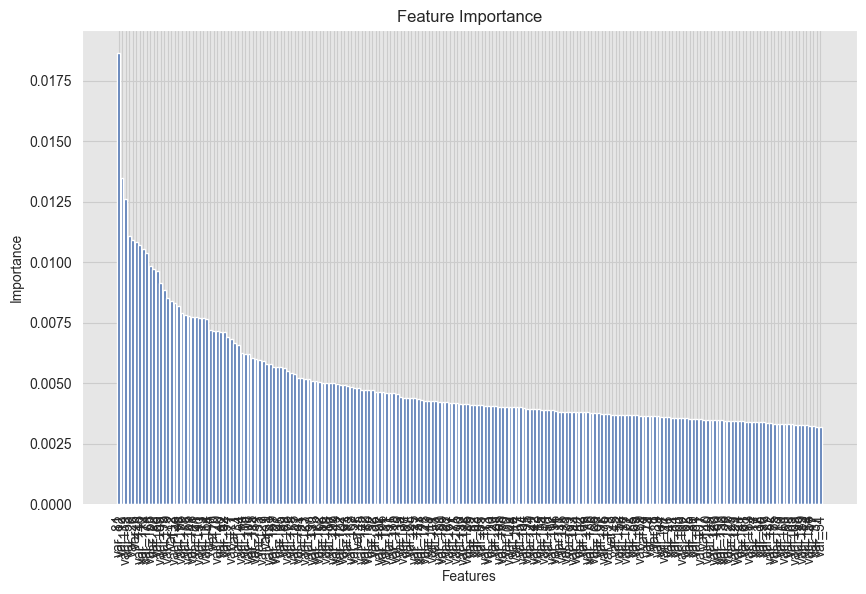

In [10]:
# Get the feature importance
importance = clf.feature_importances_

feature_importance = get_feature_importance(
    features=X_train.columns, importance=importance)
print(feature_importance)

plt = get_feature_importance_plot(
    feature_importance, modelname='Random Forest')
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size


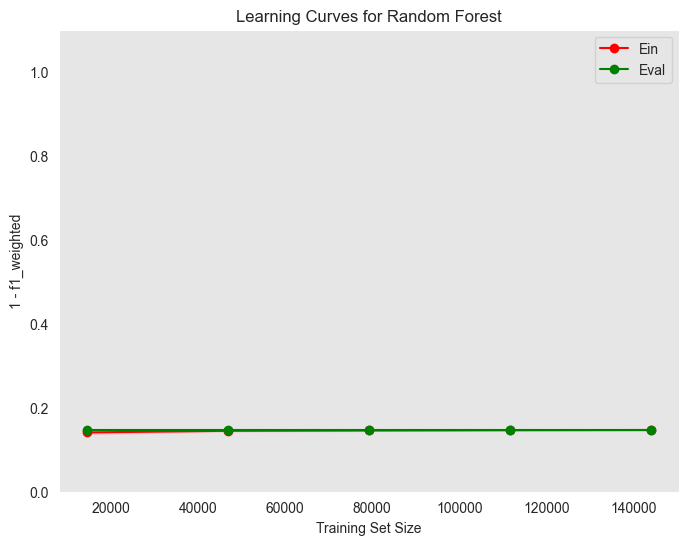

In [11]:
plt = get_learning_curve_plot(estimator=RandomForestClassifier(
    n_estimators=30, max_depth=10, min_samples_split=2), X=X_train, y=y_train, cv=NUM_FOLDS, modelname='Random Forest')
plt.show()


### Partial Dependence Plot:

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


In [8]:
plt = get_partial_dependencies_plot(clf, X_train, modelname='Random Forest')
plt.show()


ValueError: Image size of 4500x120600 pixels is too large. It must be less than 2^16 in each direction.

### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [9]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [5, 10, 20, 50, 100],
    'max_depth': [10, 20, 50, 100, 500],
    'min_samples_split': [2, 5, 10]
}


### Grid Search


In [10]:
grid_search = get_grid_search(estimator=RandomForestClassifier(
), param_grid=param_grid, X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_weighted')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_test, y_test))


Best parameters found: {'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 5}
Best score found: 0.8581959904386081
Test score with best parameters: 0.8748714579332187


### Heatmap


<module 'matplotlib.pyplot' from 'c:\\Users\\bemoi\\miniconda3\\envs\\v38_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

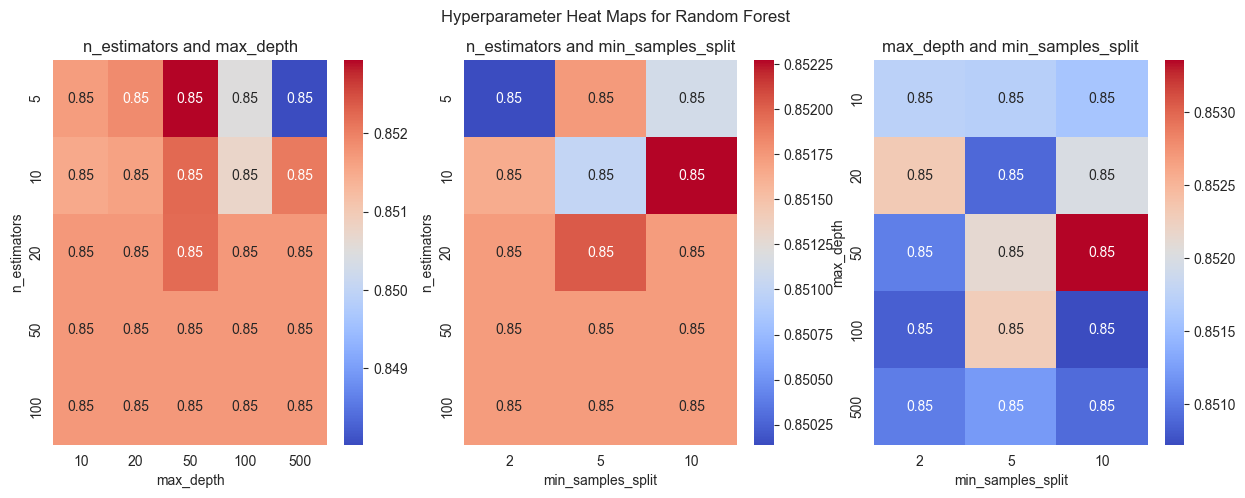

In [11]:
plot_hyper_param_heat_maps(param_grid, grid_search, modelname='Random Forest')


### Train-Validation Curve


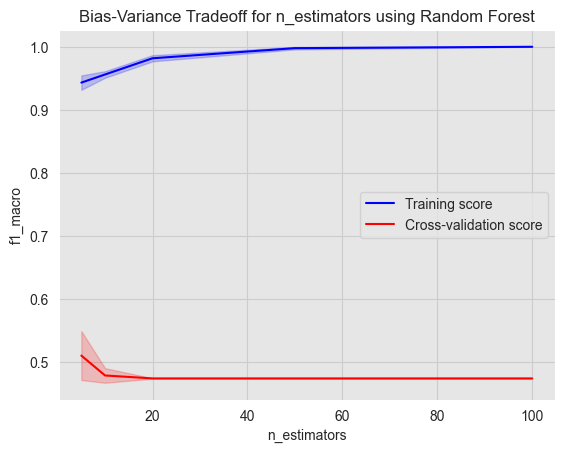

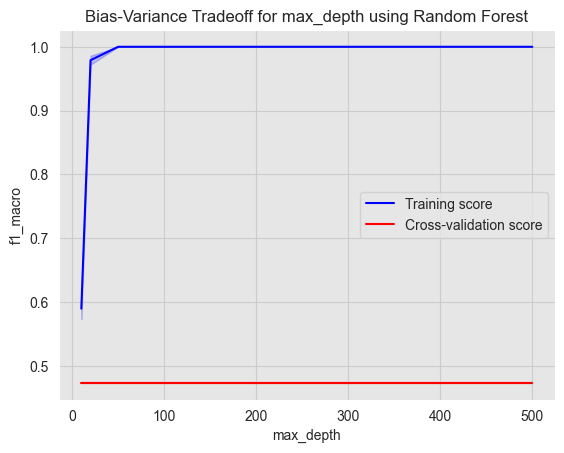

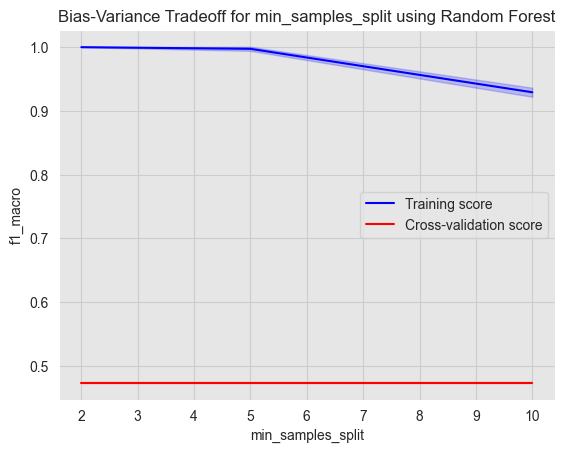

In [12]:

plot_hyper_param_train_validation_curve(estimator=RandomForestClassifier(
), param_grid=param_grid, X=X_train, y=y_train, cv=NUM_FOLDS, scoring='f1_macro', modelname='Random Forest')


## Bias-Variance Analysis


In [13]:

clf = RandomForestClassifier(
    n_estimators=100, max_depth=50, min_samples_split=2)

mse, bias, var = get_bias_variance(
    clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


In [14]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)
print("Eout estimate: ", bias+var)


mse:  0.08506249999999999
bias:  0.0849514375
var:  0.0001110625
Eout estimate:  0.0850625


### Tree Plot

A tree plot shows the structure of the decision trees used in the random forest. It can be used to understand how the model makes predictions.


In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# impurity=True shows the impurity measure at each node,
# proportion=False does not show the proportion of samples in each class,
# precision=2 sets the precision of the impurity measure to two decimal places,
# node_ids=True shows the node IDs.
plt.figure(figsize=(20, 20))
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=['0', '1'],
          fontsize=8, impurity=True, rounded=True, proportion=True, precision=2, filled=True, node_ids=True)
plt.savefig(f'../images/Random Forest/tree_plot.png',
            dpi=300, bbox_inches='tight')
plt.show()
